In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Dataframes by Loading CSV Files

In [101]:
df_humaneval_x = pd.read_csv('measurements_humaneval_x.csv')
df_humaneval_x.head()

,LLM,Benchmark prompt,Execution time (s),CPU Energy (J),RAM Energy (J),GPU Energy (J),CPU Power (W),RAM Power (W),GPU Power (W),CO2 emissions (Kg),CO2 emissions rate (Kg/s),HumanEval-X pass@1
0,llama-2-7b.Q2_K,CPP/0,21.097517,474.683629,122.223978,255.036204,22.5,5.794222,2.080334,0.000052,2.457120e-06,0.006098
1,llama-2-7b.Q2_K,CPP/1,62.684144,1410.372684,344.120273,-17.513014,22.5,5.794222,2.316614,0.000106,1.686102e-06,0.006098
2,llama-2-7b.Q2_K,CPP/2,12.251260,275.645653,60.347804,-297.584238,22.5,5.794222,28.570369,0.000002,1.907662e-07,0.006098
3,llama-2-7b.Q2_K,CPP/3,61.631703,1386.691316,426.471526,-109.179087,22.5,5.794222,0.000000,0.000104,1.682318e-06,0.006098
4,llama-2-7b.Q2_K,CPP/4,26.387190,593.704117,143.322905,-112.553090,22.5,5.794222,31.300154,0.000038,1.440018e-06,0.006098


### Calculating mean values for HumanEval-X

In [102]:
# Extract keywords from "Benchmark prompt"
df_humaneval_x['Programming Language'] = df_humaneval_x['Benchmark prompt'].str.extract(r'([A-Za-z]+)')
df_humaneval_x['Programming Language'].unique()

array(['CPP', 'Go', 'Java', 'JavaScript', 'Python'], dtype=object)

In [103]:
# Define a custom function to remove outliers and specified number of best and worst entries
def remove_extremes(group, n):
    sorted_group = group.sort_values(by='CPU Energy (J)')
    trimmed_group = sorted_group.iloc[n:-n]  # Remove the specified number of best and worst entries
    return trimmed_group

# Grouping by 'LLM' and 'Programming Language' and applying the custom function
n_outliers = 3  # Number of outliers to remove
cleaned_df_humaneval_x = df_humaneval_x.groupby(['LLM', 'Programming Language'], group_keys=False).apply(remove_extremes, n=n_outliers).reset_index(drop=True)

cleaned_df_humaneval_x['Programming Language'] = cleaned_df_humaneval_x['Programming Language'].replace('CPP', 'C++')

# Calculating the mean values for 'CPU Energy (J)' and 'HumanEval-X' after removing extremes
mean_cleaned_df_humaneval_x = cleaned_df_humaneval_x.groupby(['LLM', 'Programming Language']).agg(
    {
        'CPU Energy (J)': 'mean', 
        'Execution time (s)': 'mean', 
        'HumanEval-X pass@1': 'mean'
    }).reset_index()

# Renaming the columns for clarity
mean_cleaned_df_humaneval_x.columns = ['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)', 'HumanEval-X pass@1']
mean_cleaned_df_humaneval_x


,LLM,Programming Language,CPU Energy (J),Execution time (s),HumanEval-X pass@1
0,llama-2-7b.Q2_K,C++,1021.110587,45.383387,0.006098
1,llama-2-7b.Q2_K,Go,875.136893,38.895576,0.000000
2,llama-2-7b.Q2_K,Java,997.017385,44.312580,0.000000
3,llama-2-7b.Q2_K,JavaScript,910.354301,40.460810,0.024390
4,llama-2-7b.Q2_K,Python,863.934515,38.397681,0.054878
5,llama-2-7b.Q3_K_L,C++,1192.308960,52.992338,0.006098
6,llama-2-7b.Q3_K_L,Go,990.797149,44.036112,0.000000
7,llama-2-7b.Q3_K_L,Java,1217.004971,54.089957,0.000000
8,llama-2-7b.Q3_K_L,JavaScript,1000.621050,44.472734,0.042683
9,llama-2-7b.Q3_K_L,Python,906.935535,40.308876,0.103659


In [104]:
# NOTE: Este dataframe serve apenas para testar a criação dos gráficos de comparação entre 0-shot e n-shot prompting
# Função para aumentar em 1 todas as variáveis numéricas
def aumentar_em_um(x):
    if pd.api.types.is_numeric_dtype(x):
        if x.name == 'HumanEval-X pass@1':
            return x + 0.25
        else:
            return x + 1
    else:
        return x

# Aplicar a função ao DataFrame
df_n_shot = mean_cleaned_df_humaneval_x.apply(aumentar_em_um)
df_n_shot

,LLM,Programming Language,CPU Energy (J),Execution time (s),HumanEval-X pass@1
0,llama-2-7b.Q2_K,C++,1022.110587,46.383387,0.256098
1,llama-2-7b.Q2_K,Go,876.136893,39.895576,0.250000
2,llama-2-7b.Q2_K,Java,998.017385,45.312580,0.250000
3,llama-2-7b.Q2_K,JavaScript,911.354301,41.460810,0.274390
4,llama-2-7b.Q2_K,Python,864.934515,39.397681,0.304878
5,llama-2-7b.Q3_K_L,C++,1193.308960,53.992338,0.256098
6,llama-2-7b.Q3_K_L,Go,991.797149,45.036112,0.250000
7,llama-2-7b.Q3_K_L,Java,1218.004971,55.089957,0.250000
8,llama-2-7b.Q3_K_L,JavaScript,1001.621050,45.472734,0.292683
9,llama-2-7b.Q3_K_L,Python,907.935535,41.308876,0.353659


### HumanEval-x graphs

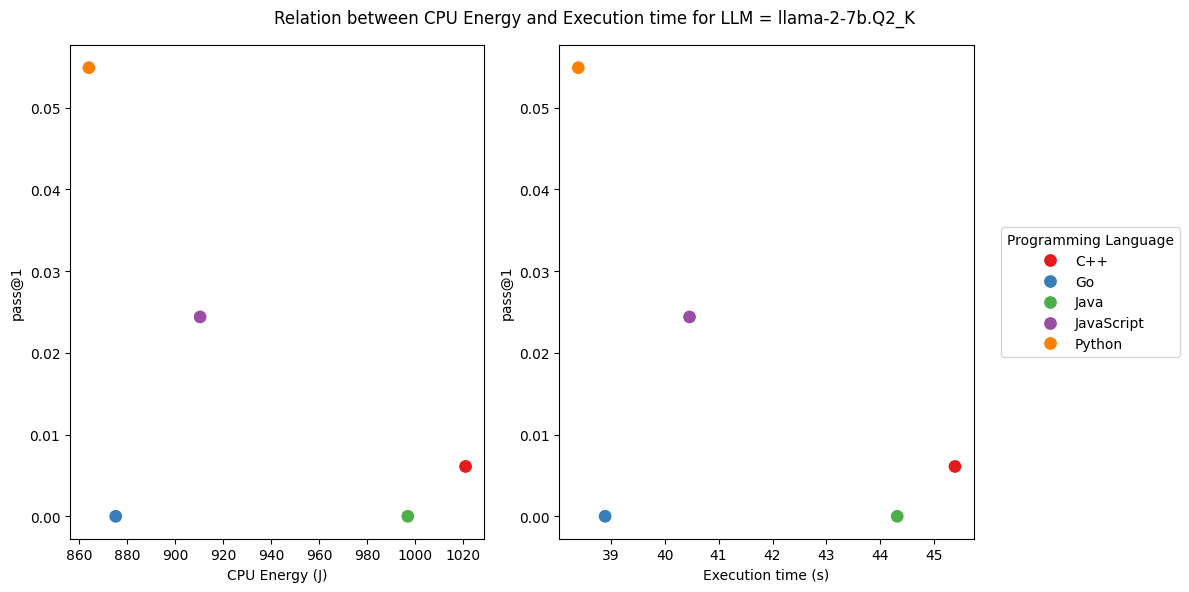

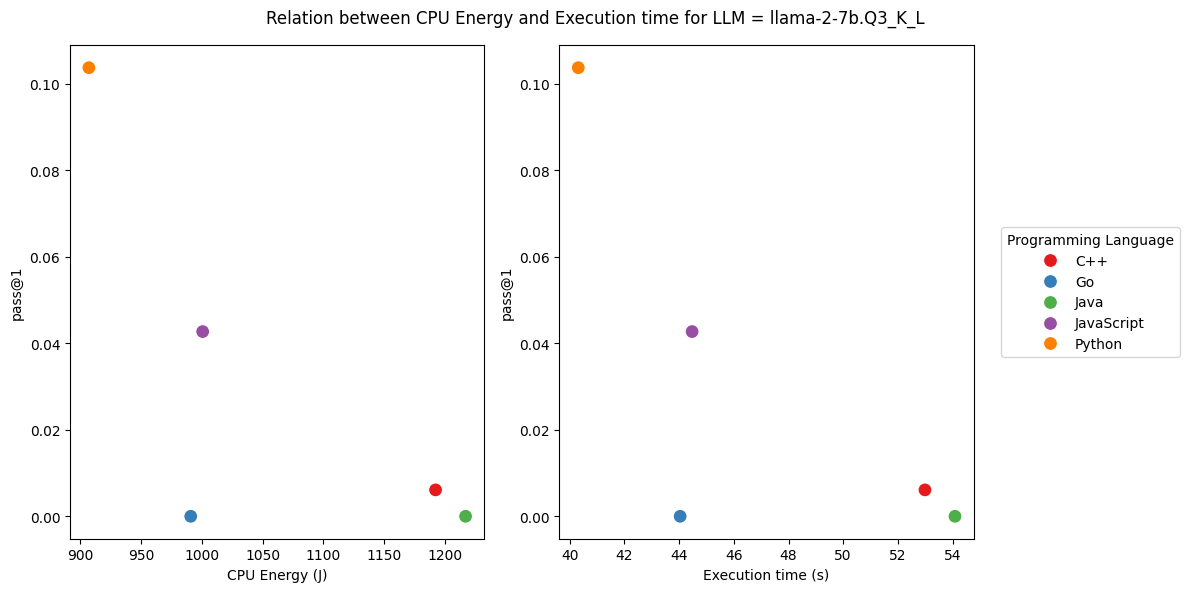

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique values of "LLM"
llm_values = mean_cleaned_df_humaneval_x['LLM'].unique()

# Iterar sobre os valores de "LLM" e criar um par de gráficos para cada
for llm_value in llm_values:
    # Filtrar DataFrame para o valor atual de "LLM"
    df_filtered = mean_cleaned_df_humaneval_x[mean_cleaned_df_humaneval_x['LLM'] == llm_value]
    
    # Criar figura com subplots para o par de gráficos
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Gráfico de Scatterplot para CPU Energy
    sns.scatterplot(data=df_filtered, x='CPU Energy (J)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', s=100, legend=False, ax=axs[0])
    axs[0].set_xlabel('CPU Energy (J)')
    axs[0].set_ylabel('pass@1')
    
    # Gráfico de Scatterplot para Execution Time
    sns.scatterplot(data=df_filtered, x='Execution time (s)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', s=100, ax=axs[1])
    axs[1].set_xlabel('Execution time (s)')
    axs[1].set_ylabel('pass@1')

    # Definir título da imagem
    fig.suptitle(f'Relation between CPU Energy and Execution time for LLM = {llm_value}')

    # Mover a legenda do primeiro gráfico para depois do segundo gráfico
    handles, labels = axs[1].get_legend_handles_labels()
    axs[1].legend(handles, labels, title='Programming Language', bbox_to_anchor=(1.05, 0.5), loc='center left')

    # Ajustar o layout para evitar sobreposição de títulos
    plt.tight_layout()

    # Mostrar a figura
    plt.show()


### 0-shot vs N-shot prompting

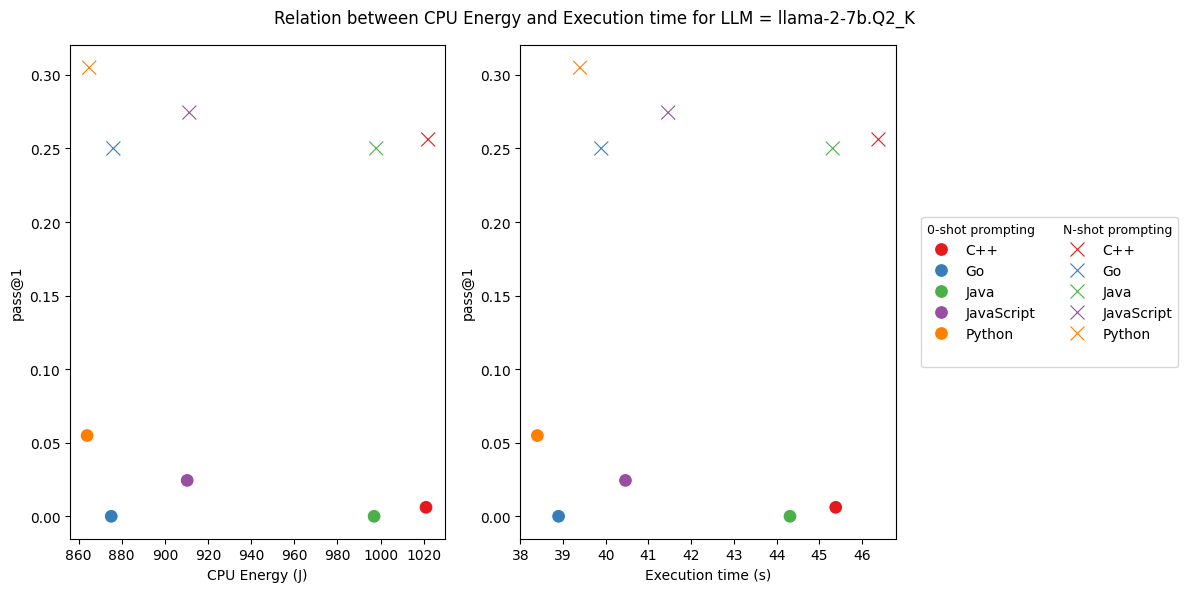

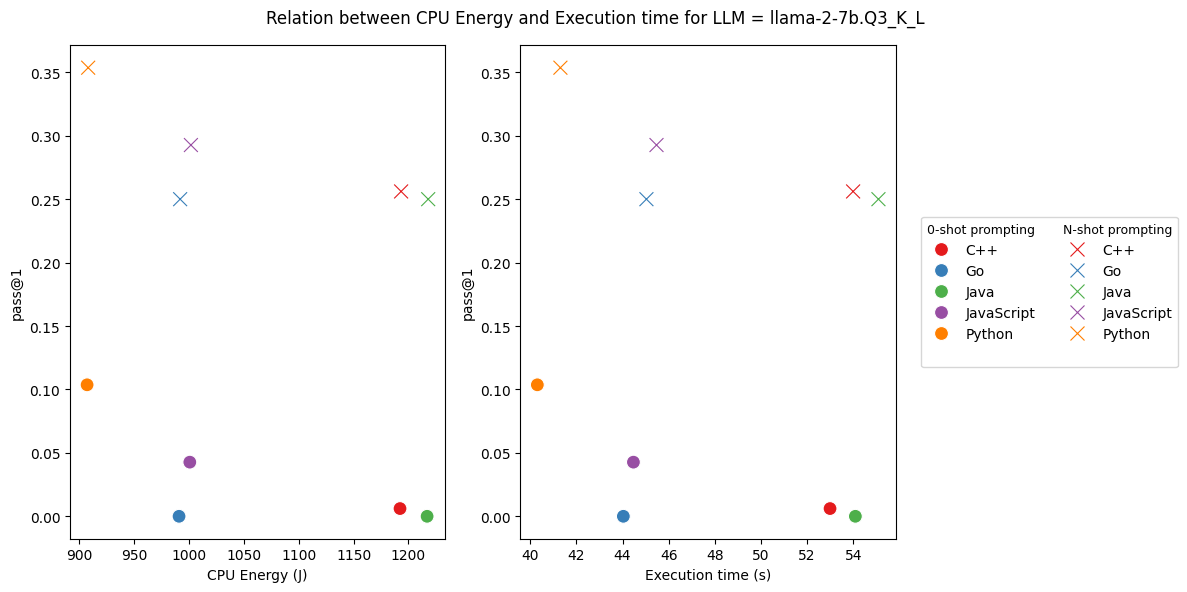

In [167]:
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import seaborn as sns

# Get unique values of "LLM"
llm_values = mean_cleaned_df_humaneval_x['LLM'].unique()

# Iterar sobre os valores de "LLM" e criar um par de gráficos para cada
for llm_value in llm_values:
    # Filtrar DataFrame para o valor atual de "LLM"
    df_filtered = mean_cleaned_df_humaneval_x[mean_cleaned_df_humaneval_x['LLM'] == llm_value]
    df_filtered_n = df_n_shot[df_n_shot['LLM'] == llm_value]  # Filtrar o segundo DataFrame
    
    # Criar figura com subplots para o par de gráficos
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Gráfico de Scatterplot para CPU Energy
    sns.scatterplot(data=df_filtered, x='CPU Energy (J)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', legend=False,s=100, ax=axs[0])
    
    # Adicionar marcação para os pontos do segundo dataframe
    sns.scatterplot(data=df_filtered_n, x='CPU Energy (J)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', legend=False,s=100, marker='x', ax=axs[0])
    
    axs[0].set_xlabel('CPU Energy (J)')
    axs[0].set_ylabel('pass@1')
    
    # Gráfico de Scatterplot para Execution Time
    sns.scatterplot(data=df_filtered, x='Execution time (s)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', s=100, ax=axs[1])
    
    # Adicionar marcação para os pontos do segundo dataframe
    sns.scatterplot(data=df_filtered_n, x='Execution time (s)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', s=100, marker='x', ax=axs[1])

    axs[1].set_xlabel('Execution time (s)')
    axs[1].set_ylabel('pass@1')

    # Definir título da imagem
    fig.suptitle(f'Relation between CPU Energy and Execution time for LLM = {llm_value}')

    # Mover a legenda do primeiro gráfico para depois do segundo gráfico
    handles, labels = axs[1].get_legend_handles_labels()
    
    class LegendTitle(object):
        def __init__(self, text_props=None):
            self.text_props = text_props or {}
            super(LegendTitle, self).__init__()

        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
            handlebox.add_artist(title)
            return title

    # Adicionando títulos personalizados à legenda
    legend = axs[1].legend(['0-shot prompting'] + handles[:5] + ['','N-shot prompting'] + handles[5:], 
                           [''] + labels[:5] + ['',''] + labels[5:],
                           handler_map={str: LegendTitle({'fontsize': 9})},
                           bbox_to_anchor=(1.05, 0.5), loc='center left', ncol=2)

    # Ajustar o layout para evitar sobreposição de títulos
    plt.tight_layout()

    # Mostrar a figura
    plt.show()


#### Energy

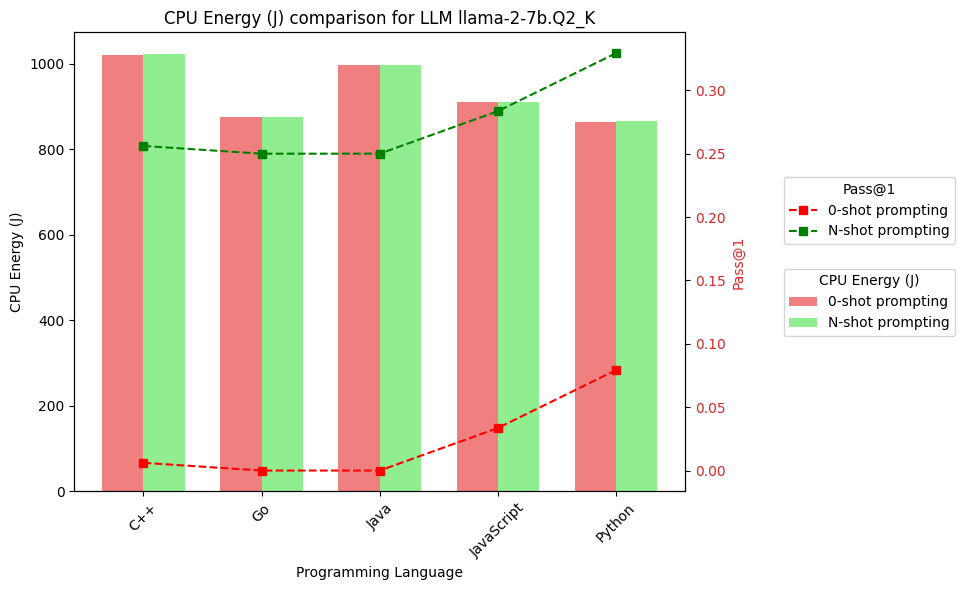

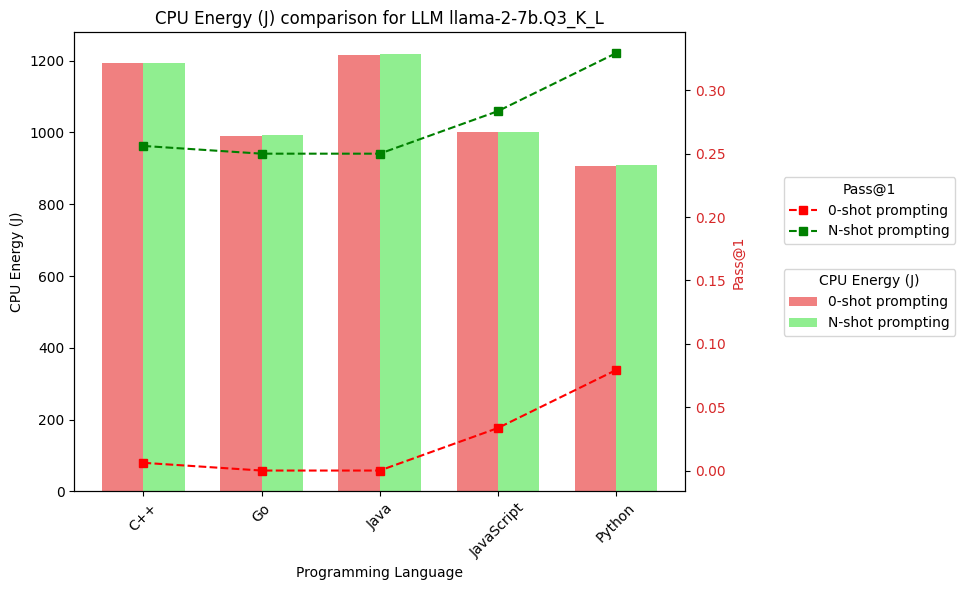

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar os dataframes por LLM
mean_cleaned_grouped = mean_cleaned_df_humaneval_x.groupby('LLM')
df_n_grouped = df_n_shot.groupby('LLM')

# Para cada grupo de LLM
for llm, mean_cleaned_group in mean_cleaned_grouped:
    df_n_group = df_n_grouped.get_group(llm)

    # Linguagens de programação
    languages = mean_cleaned_group['Programming Language'].unique()

    # Índices para as barras
    ind = np.arange(len(languages))

    # Altura das barras para mean_cleaned_df_humaneval_x e df_n_shot
    mean_cleaned_values = mean_cleaned_group.groupby('Programming Language')['CPU Energy (J)'].mean()
    df_n_values = df_n_group.groupby('Programming Language')['CPU Energy (J)'].mean()

    # Criar o gráfico de barras para o tempo de execução (CPU Energy)
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(ind - width/2, mean_cleaned_values, width, color='lightcoral', label='0-shot prompting')
    rects2 = ax.bar(ind + width/2, df_n_values, width, color='lightgreen', label='N-shot prompting')

    # Adicionar rótulos, título e legendas
    ax.set_xlabel('Programming Language')
    ax.set_ylabel('CPU Energy (J)')
    ax.set_title(f'CPU Energy (J) comparison for LLM {llm}')
    ax.set_xticks(ind)
    ax.set_xticklabels(languages)

    # Rotacionar rótulos do eixo x
    plt.xticks(rotation=45)

    # Criar eixo yy (eixo y secundário) para os lineplots dos valores de "pass@1"
    ax2 = ax.twinx()  # Criar eixo y secundário
    color = 'tab:red'
    ax2.set_ylabel('Pass@1', color=color)
    ax2.plot(ind, mean_cleaned_pass_values, marker='s', color='red', linestyle='dashed', label='0-shot prompting')
    ax2.plot(ind, df_n_pass_values, marker='s', color='green', linestyle='dashed', label='N-shot prompting')
    ax2.tick_params(axis='y', labelcolor=color)

    # Mover legendas para fora do gráfico
    ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5), title='CPU Energy (J)')
    ax2.legend(loc='upper left', bbox_to_anchor=(1.15, 0.7), title='Pass@1')

    # Ajustar layout
    plt.tight_layout()
    plt.show()


#### Time

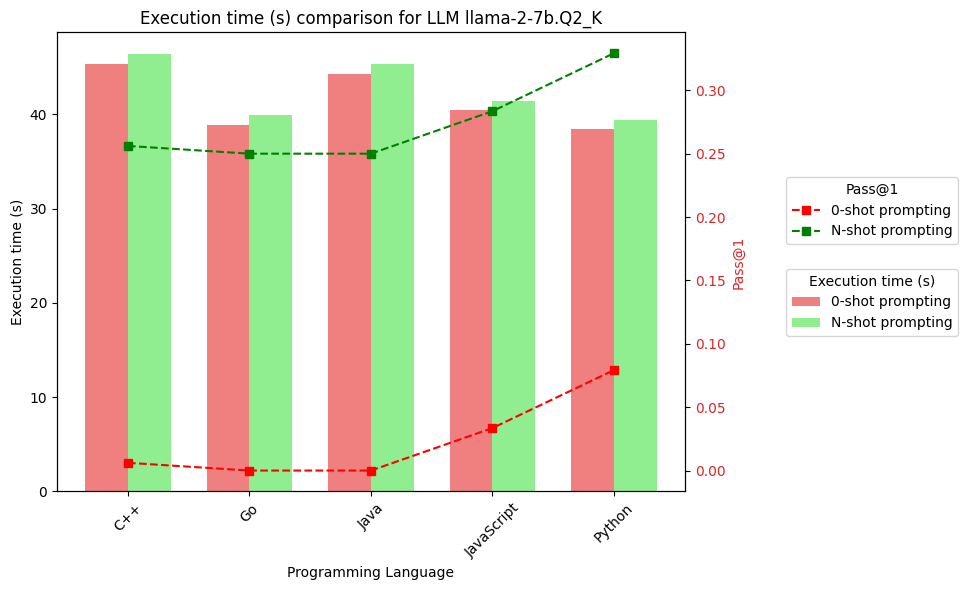

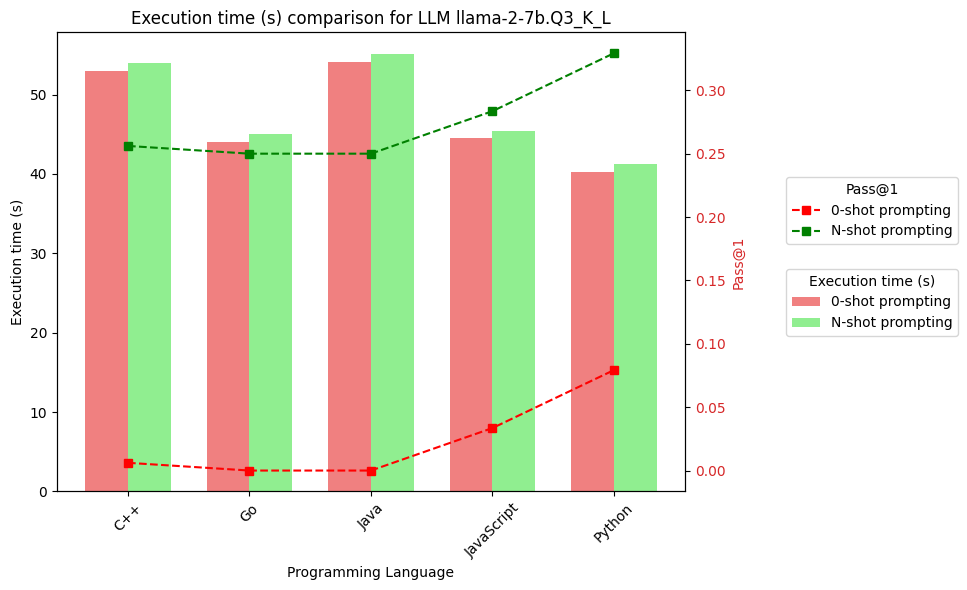

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar os dataframes por LLM
mean_cleaned_grouped = mean_cleaned_df_humaneval_x.groupby('LLM')
df_n_grouped = df_n_shot.groupby('LLM')

# Para cada grupo de LLM
for llm, mean_cleaned_group in mean_cleaned_grouped:
    df_n_group = df_n_grouped.get_group(llm)

    # Linguagens de programação
    languages = mean_cleaned_group['Programming Language'].unique()

    # Índices para as barras
    ind = np.arange(len(languages))

    # Altura das barras para mean_cleaned_df_humaneval_x e df_n_shot
    mean_cleaned_values = mean_cleaned_group.groupby('Programming Language')['Execution time (s)'].mean()
    df_n_values = df_n_group.groupby('Programming Language')['Execution time (s)'].mean()

    # Criar o gráfico de barras para o tempo de execução (CPU Energy)
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(ind - width/2, mean_cleaned_values, width, color='lightcoral', label='0-shot prompting')
    rects2 = ax.bar(ind + width/2, df_n_values, width, color='lightgreen', label='N-shot prompting')

    # Adicionar rótulos, título e legendas
    ax.set_xlabel('Programming Language')
    ax.set_ylabel('Execution time (s)')
    ax.set_title(f'Execution time (s) comparison for LLM {llm}')
    ax.set_xticks(ind)
    ax.set_xticklabels(languages)

    # Rotacionar rótulos do eixo x
    plt.xticks(rotation=45)

    # Criar eixo yy (eixo y secundário) para os lineplots dos valores de "pass@1"
    ax2 = ax.twinx()  # Criar eixo y secundário
    color = 'tab:red'
    ax2.set_ylabel('Pass@1', color=color)
    ax2.plot(ind, mean_cleaned_pass_values, marker='s', color='red', linestyle='dashed', label='0-shot prompting')
    ax2.plot(ind, df_n_pass_values, marker='s', color='green', linestyle='dashed', label='N-shot prompting')
    ax2.tick_params(axis='y', labelcolor=color)

    # Mover legendas para fora do gráfico
    ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5), title='Execution time (s)')
    ax2.legend(loc='upper left', bbox_to_anchor=(1.15, 0.7), title='Pass@1')

    # Ajustar layout
    plt.tight_layout()
    plt.show()
